In [2]:
!pip install pandas numpy scipy matplotlib pingouin jupyter ipykernel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 5.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 5.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 5.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 6.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 6.0 MB/s 

In [59]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from typing import Tuple

# Nicer plots
plt.rcParams.update({"figure.figsize": (8,4), "axes.grid": True})

df = pd.read_csv("data.csv")
df.head()
print(df.count())


Participant            8
Seconds Basisphase     8
Seconds Systemphase    8
TLX Basisphase         8
TLX Systemphase        8
SUS Basisphase         8
SUS Systemphase        8
Alter                  8
Geschlecht             8
dtype: int64


In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

PALETTE = {
    "basis":  "#FF6B6B",   # Coral/Red
    "system": "#4ECDC4",   # Teal
    "accent": "#556270",   # Dark desaturated blue
    "grey":   "#ADB5BD",
    "bg":     "#FFFFFF"
}

def set_saas_style():
    mpl.rcParams.update({
        # Fonts & text
        "font.size": 11,
        "font.family": "DejaVu Sans",
        "axes.titleweight": "medium",
        "axes.labelweight": "regular",
        "axes.titlesize": 12,
        "axes.labelsize": 11,
        "figure.titlesize": 13,
        # Colors
        "axes.edgecolor": "#F1F3F5",
        "axes.labelcolor": "#343A40",
        "xtick.color": "#495057",
        "ytick.color": "#495057",
        "text.color":   "#212529",
        # Grid
        "axes.grid": True,
        "grid.color": "#E9ECEF",
        "grid.linewidth": 0.8,
        "grid.alpha": 1,
        "axes.axisbelow": True,
        # Spines
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.spines.left": False,
        "axes.spines.bottom": False,
        # Figure
        "figure.facecolor": PALETTE["bg"],
        "axes.facecolor":   PALETTE["bg"],
        # Lines / Errorbars
        "lines.linewidth": 2.0,
        "errorbar.capsize": 4,
        # Savefig
        "savefig.facecolor": PALETTE["bg"],
        "savefig.dpi": 300,
    })

def rounded_bar(ax, x, height, width=0.8, color="#4ECDC4", radius=4):
    # x = Mittelpunkt -> wir schieben links um width/2
    rect = FancyBboxPatch((x - width/2, 0),
                          width, height,
                          boxstyle=f"round,pad=0,rounding_size={radius}",
                          linewidth=0, facecolor=color)
    ax.add_patch(rect)
    return rect

def ci_band(ax, x, lower, upper, color, alpha=0.15):
    ax.fill_between(x, lower, upper, color=color, alpha=alpha, linewidth=0)


In [61]:
age_col = "Alter"
sex_col = "Geschlecht"   # Werte: "M" / "W" (ggf. weitere)

# Grund-Stats Alter
age = df[age_col].dropna()
age_stats = age.agg(['count','mean','std','median','min','max']).rename({
    'count':'n','mean':'mean','std':'std','median':'median','min':'min','max':'max'
})

# IQR
iqr = age.quantile(0.75) - age.quantile(0.25)

# 95%-CI des Mittelwerts (t-basiert)
ci_low, ci_high = stats.t.interval(df=len(age)-1,
                                   loc=age.mean(),
                                   scale=stats.sem(age),
                                   confidence=0.95)

# Geschlecht-Verteilung
sex_counts = df[sex_col].value_counts(dropna=False)
sex_percent = (sex_counts / sex_counts.sum() * 100).round(1)

# Ausgabe hübsch formatiert
print("Alter (Jahre)")
print(age_stats)
print(f"IQR: {iqr:.2f}")
print(f"95%-CI des Mittelwerts: [{ci_low:.2f}, {ci_high:.2f}]")
print("\nGeschlecht")
for k,v in sex_counts.items():
    print(f"{k}: {v} ({sex_percent[k]}%)")


Alter (Jahre)
n          8.000000
mean      35.125000
std       14.798045
median    29.000000
min       22.000000
max       59.000000
Name: Alter, dtype: float64
IQR: 13.50
95%-CI des Mittelwerts: [22.75, 47.50]

Geschlecht
W: 5 (62.5%)
M: 3 (37.5%)


In [62]:
# Utility funcs
def mean_ci(a: np.ndarray, confidence: float = 0.95) -> Tuple[float, float, float]:
    """
    Mittelwert und zweiseitiges (1-alpha)% t-Konfidenzintervall.
    """
    a = np.array(a, dtype=float)
    n = len(a)
    m = np.mean(a)
    se = stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2.0, n - 1)
    return m, m - h, m + h

def paired_t_with_dz(before: np.ndarray, after: np.ndarray) -> dict:
    """
    Gepaarter t-Test + Effektstärke d_z (Cousineau & O'Brien).
    d_z = mean(diff) / sd(diff)
    """
    diff = np.array(before) - np.array(after)
    t_stat, p_val = stats.ttest_rel(before, after)
    dz = diff.mean() / diff.std(ddof=1)
    # CI für Mittelwertsdifferenz
    m_diff, ci_low, ci_high = mean_ci(diff)
    return {
        "t": t_stat,
        "p": p_val,
        "dz": dz,
        "mean_diff": m_diff,
        "ci_diff_low": ci_low,
        "ci_diff_high": ci_high
    }

def wilcoxon_signed(before: np.ndarray, after: np.ndarray) -> dict:
    """
    Wilcoxon Signed-Rank Test (zweiseitig) + Effektmaß r = Z / sqrt(N)
    """
    diff = np.array(before) - np.array(after)
    res = stats.wilcoxon(before, after, alternative="two-sided", zero_method="wilcox")
    # Z-Approximation: scipy gibt T, p; wir approximieren Z aus p (für große N ok).
    # Für kleine N kann man r auch via |W - mu_W| / sigma_W berechnen.
    # Hier einfache Annäherung über inverser Normalverteilung:
    z = stats.norm.isf(res.pvalue/2) * np.sign(res.statistic - (len(diff)*(len(diff)+1)/4))
    r = z / np.sqrt(len(diff))
    return {
        "W": res.statistic,
        "p": res.pvalue,
        "z_approx": z,
        "r": r
    }

def summarize_metric(df, metric_name_base, metric_name_sys, label):
    """
    Druckt deskriptive Werte und führt Tests durch.
    """
    base = df[metric_name_base].to_numpy(dtype=float)
    sys  = df[metric_name_sys].to_numpy(dtype=float)

    # Deskriptiv
    m_b, l_b, u_b = mean_ci(base)
    m_s, l_s, u_s = mean_ci(sys)

    # Tests
    t_res = paired_t_with_dz(base, sys)
    w_res = wilcoxon_signed(base, sys)

    print(f"=== {label} ===")
    print(f"Basisphase:  M={m_b:.2f}, 95% CI [{l_b:.2f}, {u_b:.2f}], SD={np.std(base, ddof=1):.2f}, N={len(base)}")
    print(f"Systemphase: M={m_s:.2f}, 95% CI [{l_s:.2f}, {u_s:.2f}], SD={np.std(sys, ddof=1):.2f}, N={len(sys)}")
    print()
    print("Paired t-Test:")
    print(f"  t({len(base)-1}) = {t_res['t']:.2f}, p = {t_res['p']:.4f}, d_z = {t_res['dz']:.2f}")
    print(f"  ΔM = {t_res['mean_diff']:.2f} (95% CI [{t_res['ci_diff_low']:.2f}, {t_res['ci_diff_high']:.2f}])")
    if t_res['p'] < 0.05:
        print("  -> Signifikanter Unterschied (p < .05)")
    else:
        print("  -> Kein signifikanter Unterschied (p ≥ .05)")
    print()
    print("Wilcoxon Signed-Rank:")
    print(f"  W = {w_res['W']:.2f}, p = {w_res['p']:.4f}, r ≈ {w_res['r']:.2f}")
    if w_res['p'] < 0.05:
        print("  -> Signifikanter Unterschied (p < .05)")
    else:
        print("  -> Kein signifikanter Unterschied (p ≥ .05)")
    print("\n")

def paired_plot(df, col_base, col_sys, ylabel, title):
    """
    Paired Line Plot + 95%-CI Balkenplot.
    """
    base = df[col_base].to_numpy(dtype=float)
    sys  = df[col_sys].to_numpy(dtype=float)

    # Paired lines
    fig, ax = plt.subplots()
    for b, s in zip(base, sys):
        ax.plot([0,1], [b,s], marker='o', alpha=0.7)
    ax.set_xticks([0,1])
    ax.set_xticklabels(["Basisphase", "Systemphase"])
    ax.set_ylabel(ylabel)
    ax.set_title(title + " - Paired Lines")
    plt.show()

    # Bar with 95% CI
    fig, ax = plt.subplots()
    m_b, l_b, u_b = mean_ci(base)
    m_s, l_s, u_s = mean_ci(sys)

    means = [m_b, m_s]
    cis   = [(m_b-l_b, u_b-m_b), (m_s-l_s, u_s-m_s)]

    ax.bar([0,1], means, yerr=np.array(cis).T, capsize=6)
    ax.set_xticks([0,1])
    ax.set_xticklabels(["Basisphase", "Systemphase"])
    ax.set_ylabel(ylabel)
    ax.set_title(title + " - Mittelwerte (95% CI)")
    plt.show()


=== Zeit (s) ===
Basisphase:  M=178.75, 95% CI [94.82, 262.68], SD=100.40, N=8
Systemphase: M=114.00, 95% CI [68.32, 159.68], SD=54.64, N=8

Paired t-Test:
  t(7) = 3.47, p = 0.0104, d_z = 1.23
  ΔM = 64.75 (95% CI [20.65, 108.85])
  -> Signifikanter Unterschied (p < .05)

Wilcoxon Signed-Rank:
  W = 0.00, p = 0.0078, r ≈ -0.94
  -> Signifikanter Unterschied (p < .05)




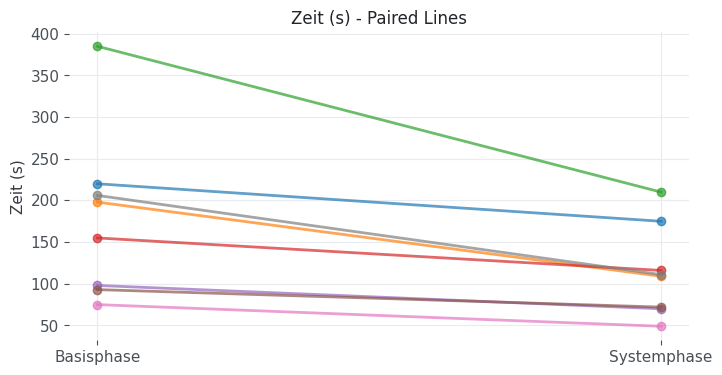

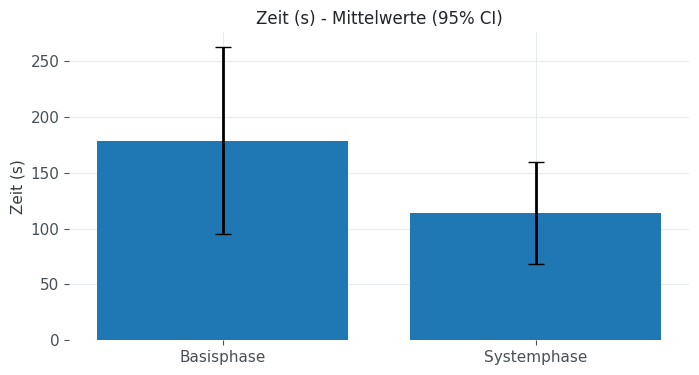

=== NASA-TLX Gesamtwert ===
Basisphase:  M=38.84, 95% CI [28.04, 49.64], SD=12.92, N=8
Systemphase: M=17.86, 95% CI [4.43, 31.30], SD=16.07, N=8

Paired t-Test:
  t(7) = 3.60, p = 0.0088, d_z = 1.27
  ΔM = 20.98 (95% CI [7.19, 34.76])
  -> Signifikanter Unterschied (p < .05)

Wilcoxon Signed-Rank:
  W = 2.00, p = 0.0234, r ≈ -0.80
  -> Signifikanter Unterschied (p < .05)




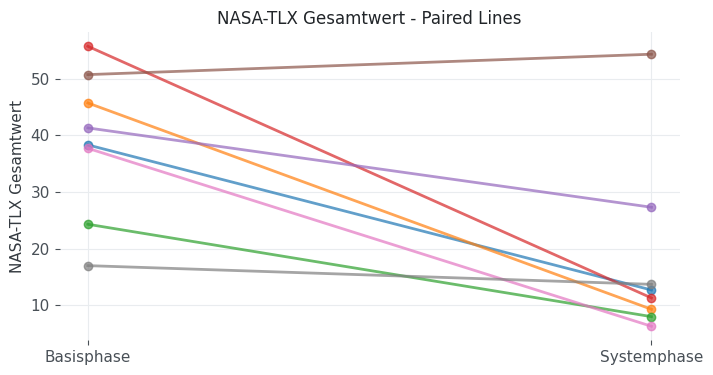

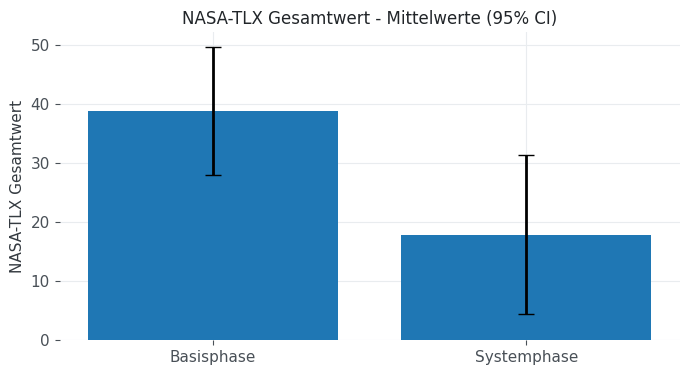

=== SUS-Score ===
Basisphase:  M=64.69, 95% CI [48.52, 80.86], SD=19.34, N=8
Systemphase: M=80.00, 95% CI [67.46, 92.54], SD=15.00, N=8

Paired t-Test:
  t(7) = -2.87, p = 0.0240, d_z = -1.02
  ΔM = -15.31 (95% CI [-27.92, -2.70])
  -> Signifikanter Unterschied (p < .05)

Wilcoxon Signed-Rank:
  W = 0.00, p = 0.0078, r ≈ -0.94
  -> Signifikanter Unterschied (p < .05)




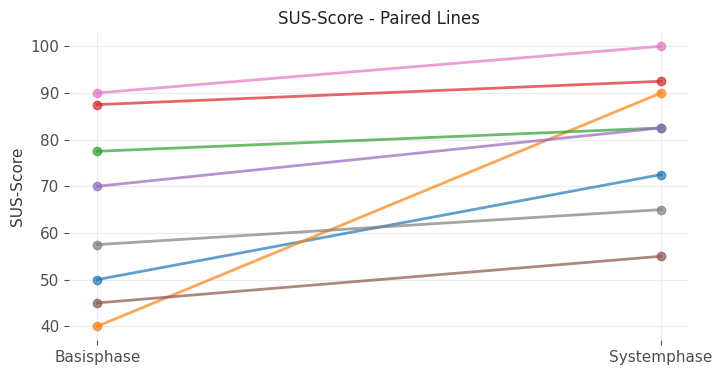

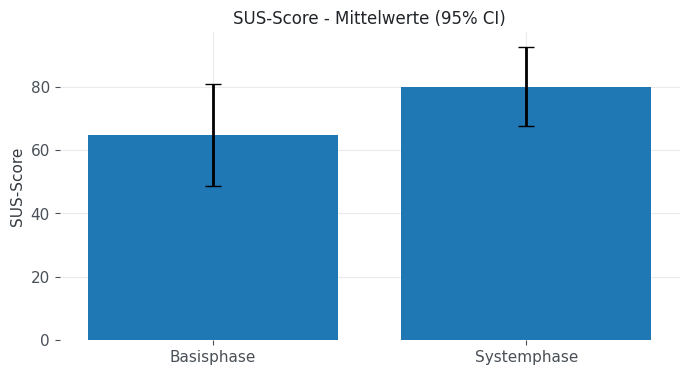

In [63]:
metrics = [
    ("Seconds Basisphase", "Seconds Systemphase", "Zeit (s)"),
    ("TLX Basisphase",     "TLX Systemphase",     "NASA-TLX Gesamtwert"),
    ("SUS Basisphase",     "SUS Systemphase",     "SUS-Score")
]

set_saas_style()

for base_col, sys_col, label in metrics:
    summarize_metric(df, base_col, sys_col, label)
    paired_plot(df, base_col, sys_col, ylabel=label, title=label)


In [64]:
def percent_change(before, after):
    return (np.mean(before) - np.mean(after)) / np.mean(before) * 100

for base_col, sys_col, label in metrics:
    base = df[base_col].to_numpy(dtype=float)
    sys  = df[sys_col].to_numpy(dtype=float)
    pc = percent_change(base, sys)
    print(f"{label}: Veränderung = {pc:.1f}%")


Zeit (s): Veränderung = 36.2%
NASA-TLX Gesamtwert: Veränderung = 54.0%
SUS-Score: Veränderung = -23.7%


In [65]:
for base_col, sys_col, label in metrics:
    diff = df[base_col].to_numpy(float) - df[sys_col].to_numpy(float)
    W, p = stats.shapiro(diff)
    print(f"Shapiro-Wilk für Differenz {label}: W={W:.2f}, p={p:.4f}")


Shapiro-Wilk für Differenz Zeit (s): W=0.82, p=0.0418
Shapiro-Wilk für Differenz NASA-TLX Gesamtwert: W=0.98, p=0.9352
Shapiro-Wilk für Differenz SUS-Score: W=0.71, p=0.0029


In [66]:
alpha = 0.05
for base_col, sys_col, label in metrics:
    base = df[base_col].to_numpy(float)
    sys  = df[sys_col].to_numpy(float)
    t_res = paired_t_with_dz(base, sys)
    verdict = "signifikant reduziert" if t_res["p"] < alpha and t_res["mean_diff"]>0 else \
              ("signifikant erhöht" if t_res["p"] < alpha and t_res["mean_diff"]<0 else "nicht signifikant verändert")
    print(f"{label}: {verdict} (p={t_res['p']:.4f}, d_z={t_res['dz']:.2f})")


Zeit (s): signifikant reduziert (p=0.0104, d_z=1.23)
NASA-TLX Gesamtwert: signifikant reduziert (p=0.0088, d_z=1.27)
SUS-Score: signifikant erhöht (p=0.0240, d_z=-1.02)
